## Explore the relationship of features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data=pd.read_csv('../data/Consumer_Complaints.csv',nrows = 2000)
data=pd.read_csv('../data/Consumer_Complaints.csv')

In [3]:
data['Date received'] = pd.to_datetime(data['Date received'],infer_datetime_format=True)
data['Date sent to company'] = pd.to_datetime(data['Date sent to company'],infer_datetime_format=True)

## Find the total number of missing values and check if they need to be filled/can be filled reasonably

In [4]:
mis_val=(data.isnull().sum(axis=0))/1437716*100  # Percentage of missing values in every feature
mis_val

Date received                    0.000000
Product                          0.000000
Sub-product                     16.356847
Issue                            0.000000
Sub-issue                       38.301793
Consumer complaint narrative    67.727215
Company public response         63.128740
Company                          0.000000
State                            1.646848
ZIP code                         9.242855
Tags                            86.357250
Consumer consent provided?      42.156587
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000070
Timely response?                 0.000000
Consumer disputed?              46.548414
Complaint ID                     0.000000
dtype: float64

The 'Tags' column is nearly always empty. So dropping it fromt he feature list.

In [5]:
data=data.drop('Tags',axis=1)

In [6]:

#data['iniZIP']=data['ZIP code'].str[:2]
#groupstate=data[['State','iniZIP']].groupby('State').apply(lambda x: x.sort_values('iniZIP'))

In [7]:
data_s=data.dropna(subset=['State'])

In [8]:
data_s.shape

(1414039, 17)

In [9]:
del data

In [10]:
miss_val=(data_s.isnull().sum(axis=0))/data_s.shape[0]*100
miss_val

Date received                    0.000000
Product                          0.000000
Sub-product                     16.545371
Issue                            0.000000
Sub-issue                       38.305591
Consumer complaint narrative    67.315187
Company public response         63.271381
Company                          0.000000
State                            0.000000
ZIP code                         7.728712
Consumer consent provided?      41.411729
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000071
Timely response?                 0.000000
Consumer disputed?              46.053044
Complaint ID                     0.000000
dtype: float64

## Create Dataset with only non-null features i.e., essential information about complaint

In [11]:
cols=miss_val[miss_val == 0].index.tolist()
cols

['Date received',
 'Product',
 'Issue',
 'Company',
 'State',
 'Submitted via',
 'Date sent to company',
 'Timely response?',
 'Complaint ID']

In [12]:
full_data=data_s[cols]

In [13]:
full_data.head()

,Date received,Product,Issue,Company,State,Submitted via,Date sent to company,Timely response?,Complaint ID
0,2015-08-09,Credit reporting,Incorrect information on credit report,Experian Information Solutions Inc.,NJ,Web,2015-08-09,Yes,1509954
1,2019-01-29,"Credit reporting, credit repair services, or o...",Problem with a credit reporting company's inve...,"EQUIFAX, INC.",NY,Web,2019-01-30,Yes,3136759
2,2019-10-13,Debt collection,Attempts to collect debt not owed,SANTANDER CONSUMER USA HOLDINGS INC.,GA,Web,2019-10-13,Yes,3404213
3,2015-08-19,Mortgage,"Loan servicing, payments, escrow account",WELLS FARGO & COMPANY,CA,Web,2015-08-19,Yes,1527601
4,2016-03-04,Credit card,Billing disputes,DISCOVER BANK,NV,Web,2016-03-04,Yes,1816726


In [14]:
full_data['Product'].unique()

array(['Credit reporting',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Mortgage', 'Credit card',
       'Bank account or service', 'Credit card or prepaid card',
       'Consumer Loan', 'Student loan',
       'Money transfer, virtual currency, or money service',
       'Checking or savings account',
       'Payday loan, title loan, or personal loan',
       'Vehicle loan or lease', 'Prepaid card', 'Money transfers',
       'Other financial service', 'Payday loan', 'Virtual currency'],
      dtype=object)

In [15]:
full_data['State'].unique()

array(['NJ', 'NY', 'GA', 'CA', 'NV', 'PA', 'MD', 'VA', 'FL', 'PR', 'NC',
       'ND', 'IL', 'VT', 'TN', 'CT', 'TX', 'AL', 'WA', 'SC', 'MO', 'UT',
       'KY', 'IN', 'OH', 'DE', 'MS', 'MI', 'CO', 'LA', 'NM', 'AZ', 'MA',
       'KS', 'NE', 'RI', 'DC', 'VI', 'ME', 'MN', 'SD', 'WI', 'OK', 'IA',
       'OR', 'AR', 'AK', 'ID', 'HI', 'NH', 'WV', 'WY', 'MT', 'AP', 'AE',
       'GU', 'AA', 'FM', 'UNITED STATES MINOR OUTLYING ISLANDS', 'MH',
       'AS', 'MP', 'PW'], dtype=object)

In [16]:
full_data['State']=full_data['State'].str.replace('UNITED STATES MINOR OUTLYING ISLANDS', 'USIs', regex=True)

C:\Users\lmw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
full_data['Product']=full_data['Product'].str.replace('Credit reporting, credit repair services, or other personal consumer reports', 'Credit reporting +', regex=True)
full_data['Product']=full_data['Product'].str.replace('Payday loan, title loan, or personal loan', 'Payday loan +', regex=True)
full_data['Product']=full_data['Product'].str.replace('Money transfer, virtual currency, or money service', 'Money transfer +', regex=True)

C:\Users\lmw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lmw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lmw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

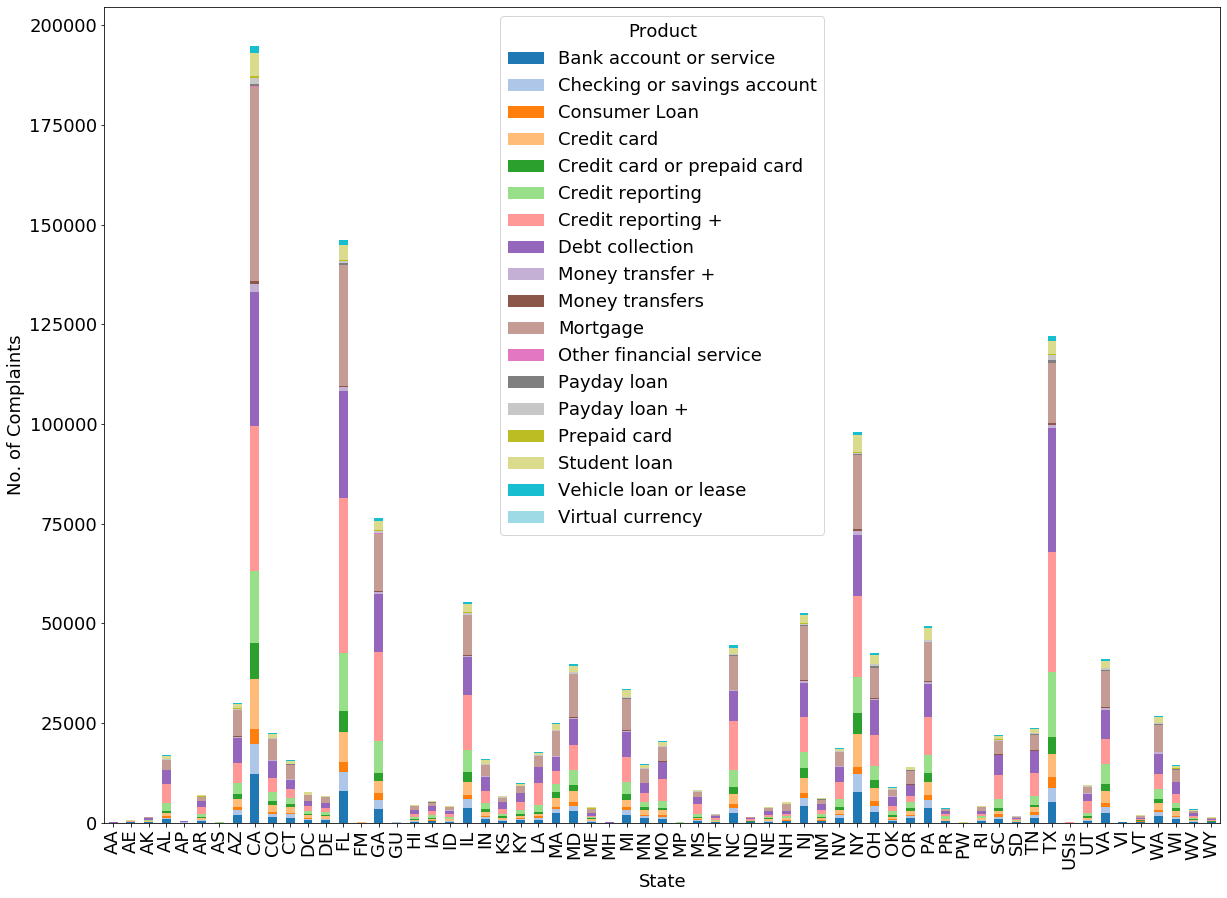

In [71]:
plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 18})
ax1=full_data.groupby(['State','Product']).size().unstack().plot(kind='bar',stacked=True,ax = plt.gca(),colormap='tab20')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.ylabel('No. of Complaints')
plt.show()

In [72]:
ax1.get_figure().savefig('../Figures/StateWide_AllDistribution_countplot_1.png')
#figure1.savefig('../Figures/StateWide_AllDistribution_countplot_2.png')
plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

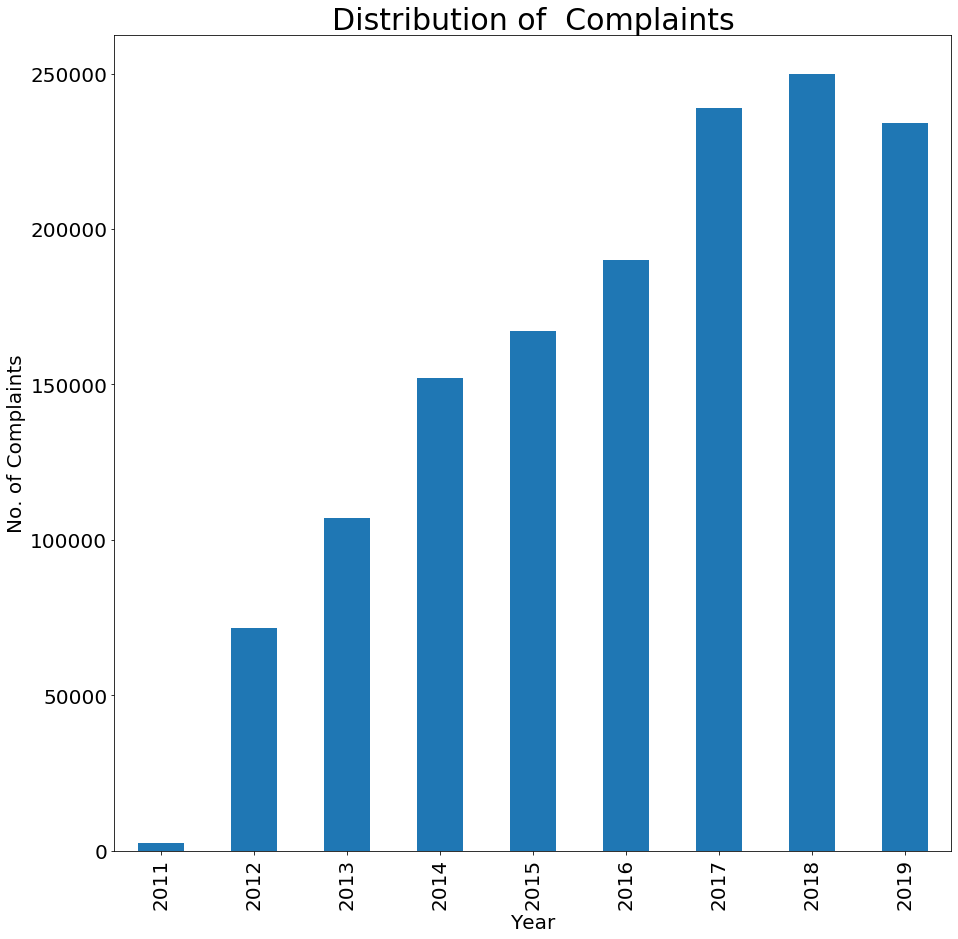

In [73]:
plt.clf()
plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size': 20})
figure=full_data['Date received'].groupby(full_data['Date received'].map(lambda x: x.year)).count().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('No. of Complaints')
plt.title('Distribution of  Complaints', fontsize = 30)
plt.show()

In [74]:
figure.get_figure().savefig('../Figures/Yearwise_Distribution_countplot_1.png', bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

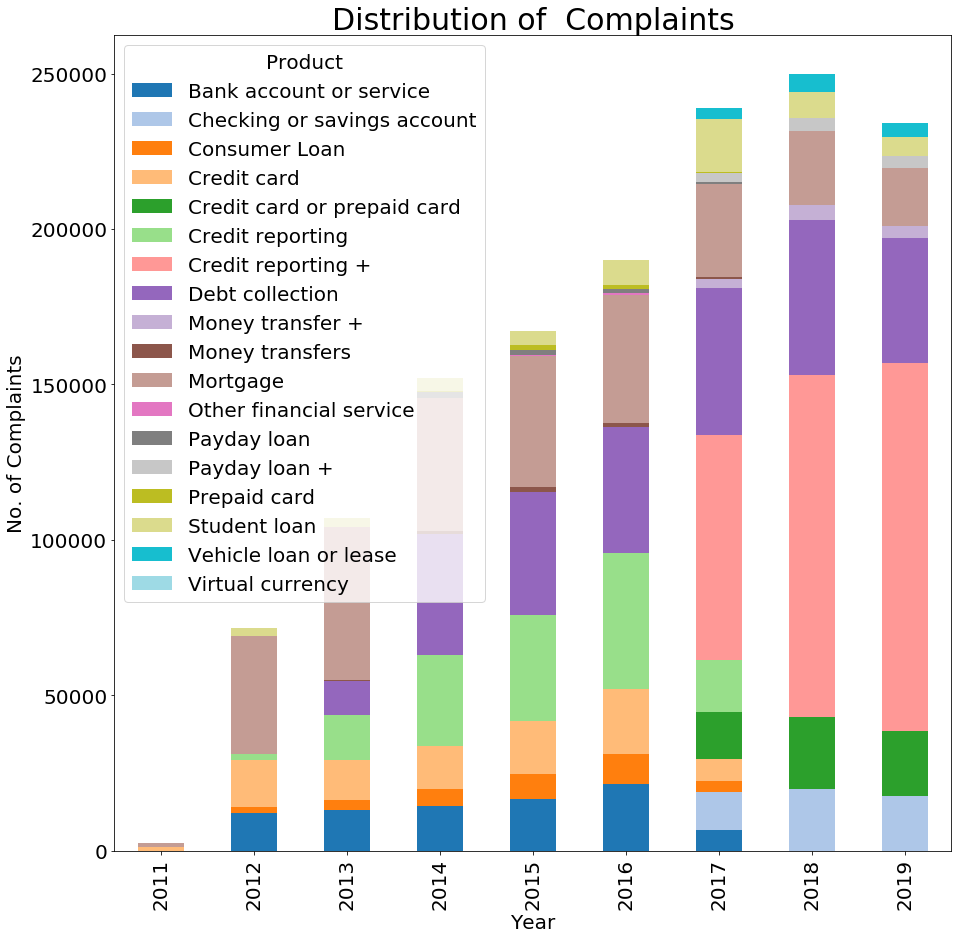

In [77]:
plt.clf()
plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size': 20})
figure1=full_data[['Date received','Product']].groupby([full_data['Date received'].map(lambda x: x.year),'Product']).size().unstack().plot(kind='bar',stacked=True,ax = plt.gca(),colormap='tab20')
plt.xlabel('Year')
plt.ylabel('No. of Complaints')
plt.title('Distribution of  Complaints', fontsize = 30)
plt.show()

In [78]:
figure1.get_figure().savefig('../Figures/Yearwise_Distribution_countplot_2.png', bbox_inches="tight")

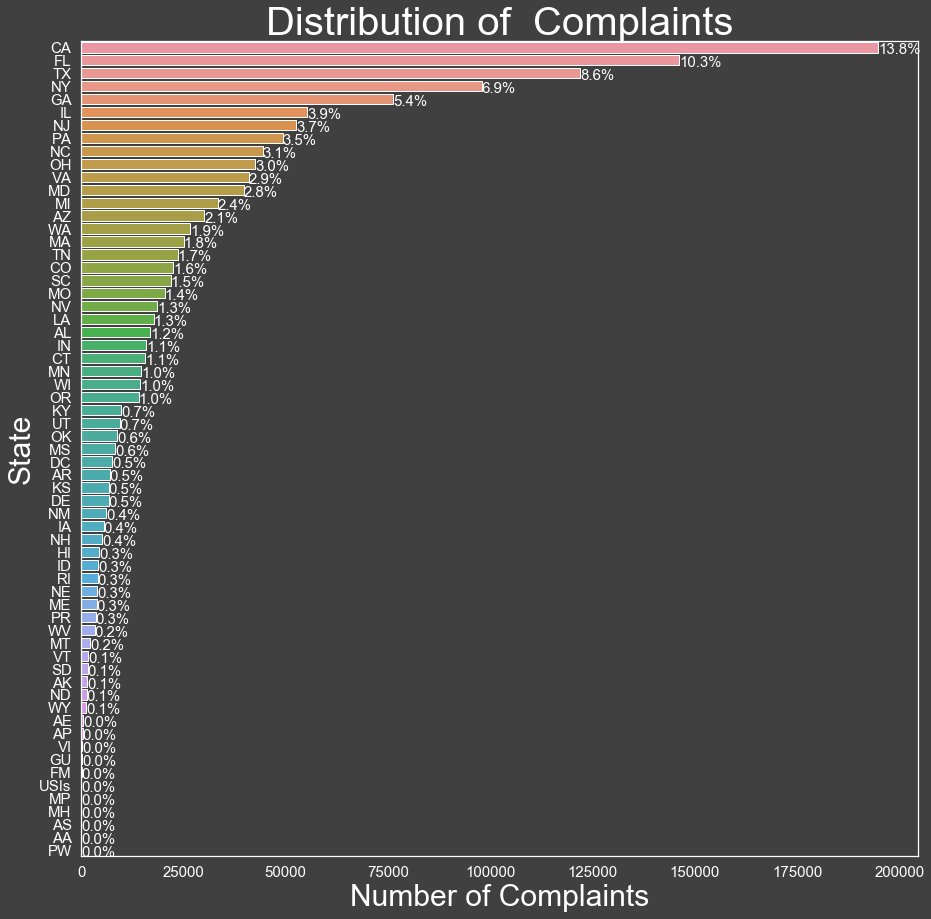

In [105]:
plt.clf()

bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(15.0, 15.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15}, font_scale=1.25)

#ax2=sns.countplot(y='State',hue = 'Timely response?',data=full_data,order = full_data['State'].value_counts().index)

ax2=sns.countplot(y='State',data=full_data,order = full_data['State'].value_counts().index)
plt.title('Distribution of  Complaints', fontsize = 40)
plt.xlabel('Number of Complaints')

total = len(full_data['State'])
for p in ax2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.05
        y = p.get_y() + p.get_height()/2+0.5
        ax2.annotate(percentage, (x, y))
    
#ax2.legend(loc='best')
#ax2.set_yticklabels(ax.get_yticklabels(),rotation=40)

In [82]:
#ax2.get_figure().savefig('../Figures/StateWide_Distribution_countplot_1.png')

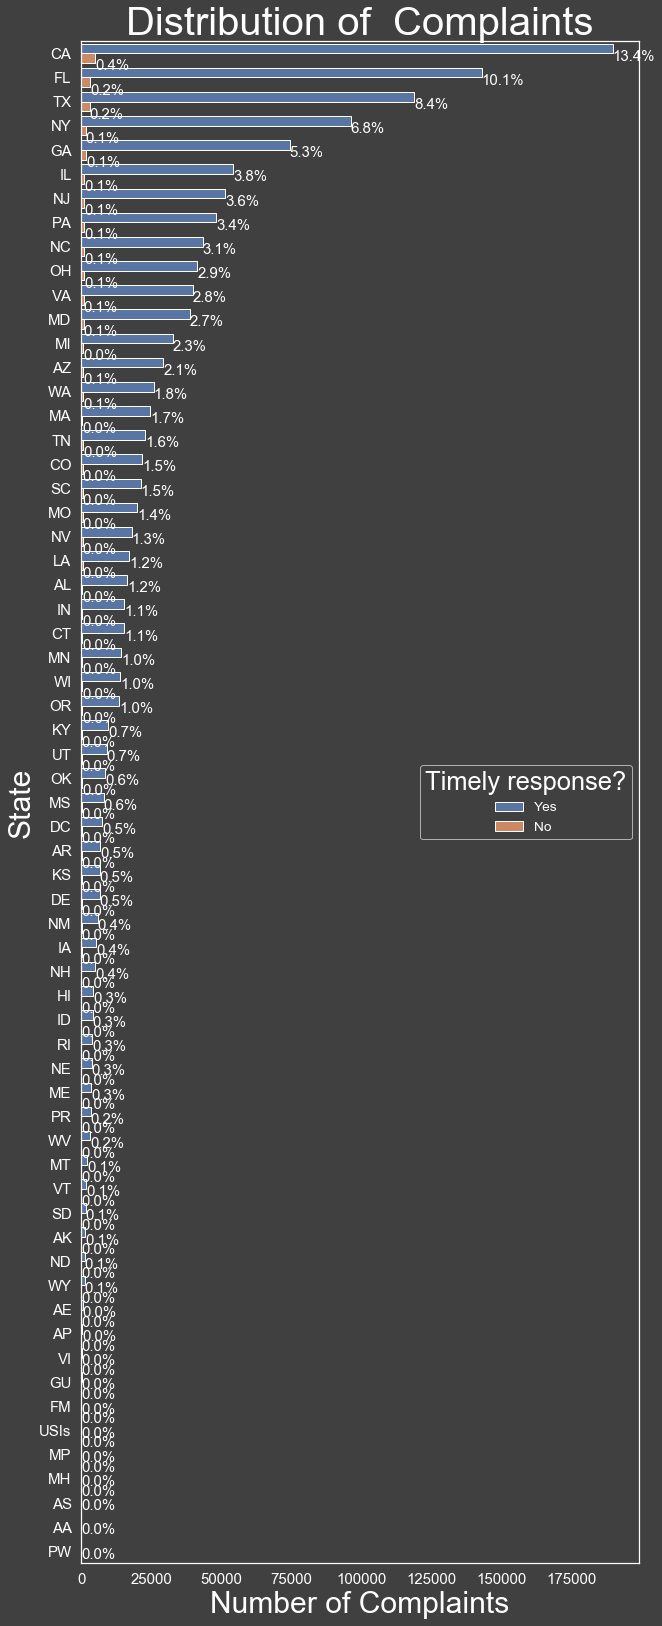

In [91]:
plt.clf()

bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(10.0, 25.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15}, font_scale=1.25)

#ax3=sns.countplot(y='State',hue = 'Product',data=full_data,order = full_data['State'].value_counts().index)
#ax3=sns.countplot(y='State',hue = 'Product',data=full_data,order = full_data['State'].value_counts().index)
ax3=sns.countplot(y='State',hue = 'Timely response?',data=full_data,order = full_data['State'].value_counts().index)
plt.title('Distribution of  Complaints', fontsize = 40)
plt.xlabel('Number of Complaints')

total = len(full_data['State'])
for p in ax3.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.05
        y = p.get_y() + p.get_height()/2+0.5
        ax3.annotate(percentage, (x, y))
    
#ax2.legend(loc='best')
#ax2.set_yticklabels(ax.get_yticklabels(),rotation=40)

In [85]:
len(full_data['Company'].unique())

5438